# Previsão de Concentração Final de Ouro Obtida a Partir da Purificação de Minério de Ouro

Foi fornecido um conjunto de dados contendo os parâmetros medidos durante o processo de purificação do minério de ouro, incluindo as concentrações em diferentes etapas, níveis dos tanques e outros. O objetivo é fazer previsões das concentrações de ouro após o primeiro e último estágios de purificação.

# Sumário
1. [Iniciação](#ini)
2. [Pré-processamento](#pp)
3. [Análise](#ana)

    A. [Concentrações de Au, Ag e Pb](#caap)
    
    B. [Distribuições de Tamanho de Partículas do Minério Alimentado](#dtpma)
    
    C. [Concentrações Totais de Todos os Metais em Diferentes Estágios](#cttmde)
    
4. [Construindo um Modelo](#cm)
5. [Conclusão](#con)

## Iniciação<a name="ini"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

state=12345

In [2]:
try:
    train = pd.read_csv('gold_recovery_train.csv', index_col='date')
    test = pd.read_csv('gold_recovery_test.csv', index_col='date')
    full = pd.read_csv('gold_recovery_full.csv', index_col='date')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
    test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
    full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')

In [3]:
train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

Observamos alguns valores ausentes

In [5]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

Novamente observamos valores ausentes

In [7]:
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

Observamos aqui também, visto que `full` contêm `train` e `test`

### Cálculo de Recuperação da Saída do Processo de Flotação no Conjunto de Treinamento

Primeiramente, iremos remover todas as entradas nulas do conjunto de treinamento.

In [9]:
train_mae = train.dropna()
train_mae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

Agora podemos calcular a recuperação da saída do processo de flotação usando a fórmula descrita no projeto e compará-la com a coluna existente `rougher.output.recovery` do DataFrame.

In [10]:
C = train_mae['rougher.output.concentrate_au']
F = train_mae['rougher.input.feed_au']
T = train_mae['rougher.output.tail_au']

train_mae['recovery'] = ((C * (F - T)) / ((F * (C - T)))) * 100

display(train_mae['recovery'].head())
display(train_mae['rougher.output.recovery'].head())

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7908\2994711788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mae['recovery'] = ((C * (F - T)) / ((F * (C - T)))) * 100


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: recovery, dtype: float64

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

Em seguida, podemos calcular o erro médio absoluto entre o que calculamos e a coluna de recuperação existente.

In [11]:
MAE = np.sum(np.abs(train_mae['recovery'] - train_mae['rougher.output.recovery']))/\
len(train_mae['rougher.output.recovery'])
print(MAE)

9.460144184559453e-15


O erro médio absoluto é descartável, pois é muito insignificante. Portanto, podemos concluir que os valores de recuperação de `rougher.output` estão corretos.

### Características não Disponíveis no Conjunto de Teste

Compararemos o conjunto de treinamento com o conjunto de teste percorrendo a lista de colunas no conjunto de treinamento e encontrando aquelas que não estão presentes no conjunto de teste.

In [12]:
df_temp = pd.DataFrame()
for col in list(train.columns):
    if col not in list(test.columns):
        df_temp[col] = train[col]
        
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

Observamos no conjunto de teste a falta de `13` parâmetros da etapa de `flotação` , `8` parâmetros da etapa de `purificação primária`, `4` parâmetros da etapa de `purificação secundária` e `9` parâmetros da etapa final, totalizando `34` parâmetros.

### Pré-processamento <a name="pp"></a>

Para preencher os valores faltantes, utilizaremos a técnica de preenchimento progressivo (forward filling), pois é comum que os valores das características próximas no tempo sejam semelhantes. Essa abordagem permite que os valores anteriores sejam copiados para as células vazias, garantindo uma continuidade na sequência temporal dos dados.

In [13]:
train = train.fillna(method='ffill', axis=0) 
test = test.fillna(method='ffill', axis=0)
full = full.fillna(method='ffill', axis=0)

## Análise <a name="ana"></a>

### Concentrações de Au, Ag e Pb <a name="caap"></a>

Criaremos gráficos de histograma para visualizar as concentrações de cada metal em cada estágio de purificação. Começaremos com o metal Ouro (Au):

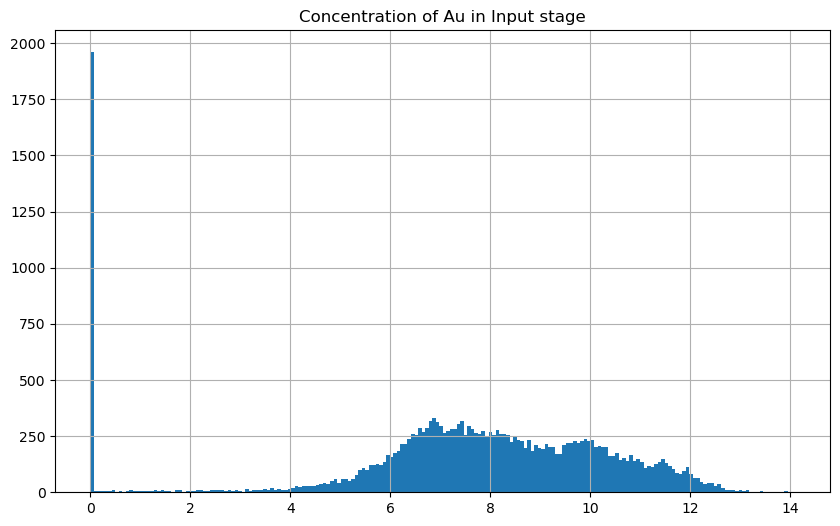

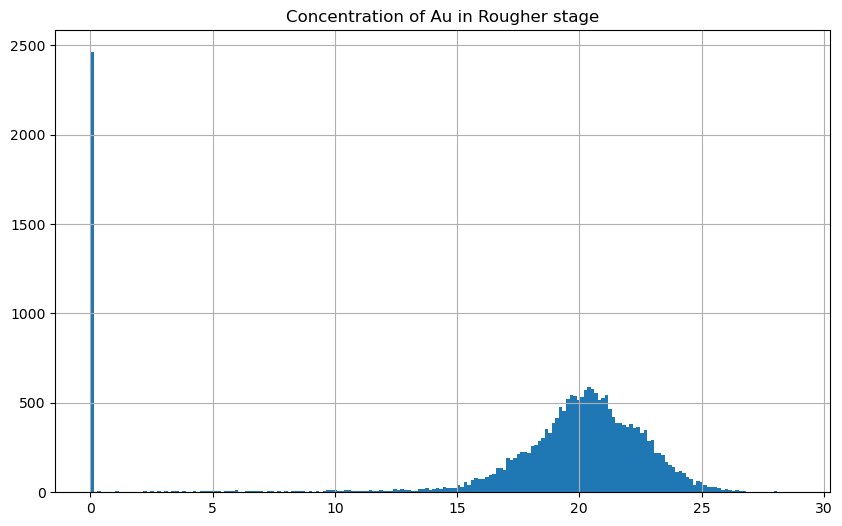

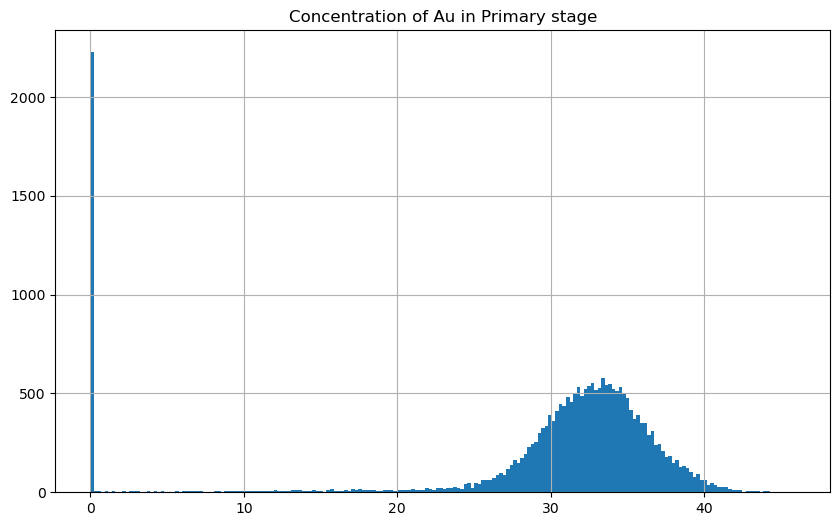

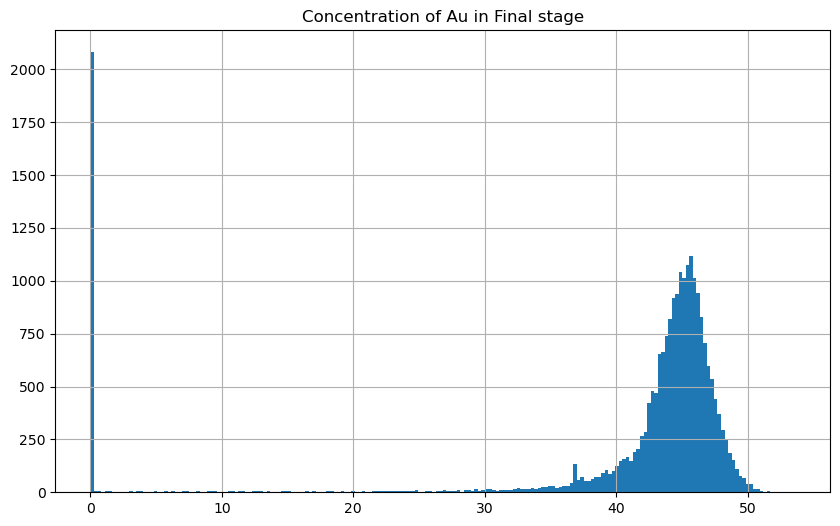

In [14]:
au_inputs = [('rougher.input.feed_au', 'Input'), ('rougher.output.concentrate_au', 'Rougher') \
          ,('primary_cleaner.output.concentrate_au', 'Primary'), ('final.output.concentrate_au', 'Final')]

for i in au_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Concentration of Au in {} stage'.format(i[1]))
    plt.show()

As concentrações de ouro são mais elevadas na etapa final. À medida que retrocedemos para as etapas iniciais, as concentrações diminuem gradualmente. No entanto, notamos a presença de muitos valores zero em todos os casos. Agora, analisaremos a concentração de prata (Ag) da mesma forma:

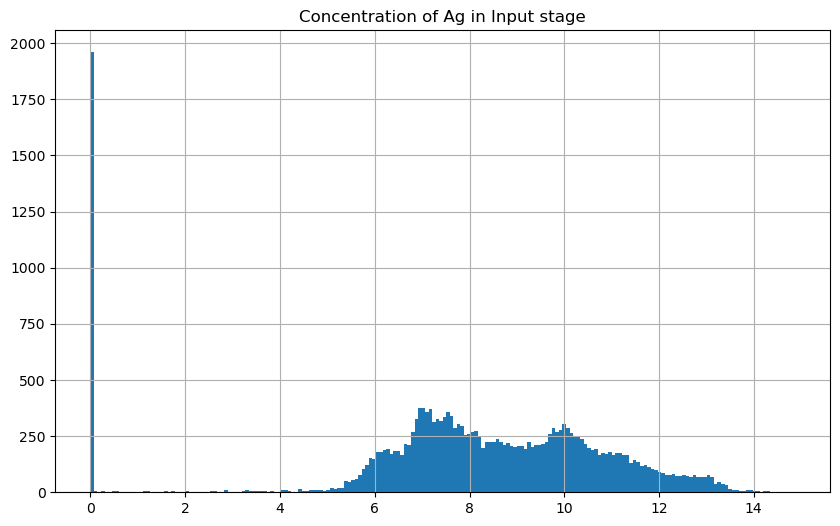

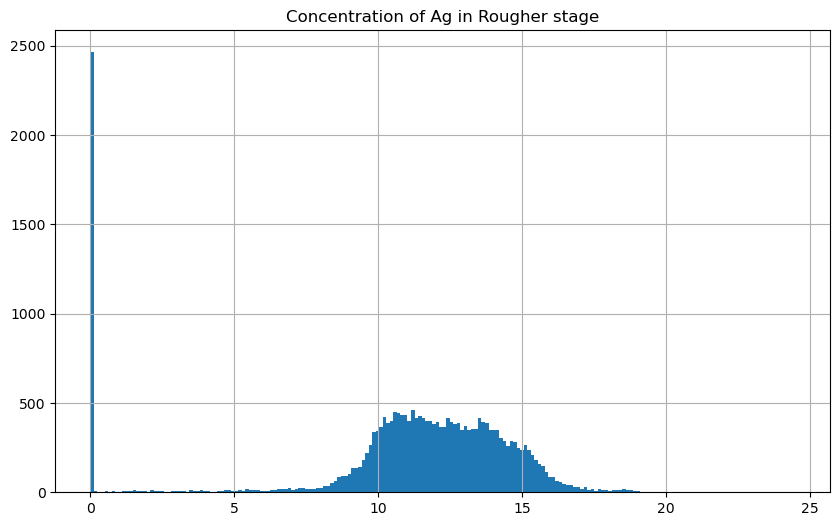

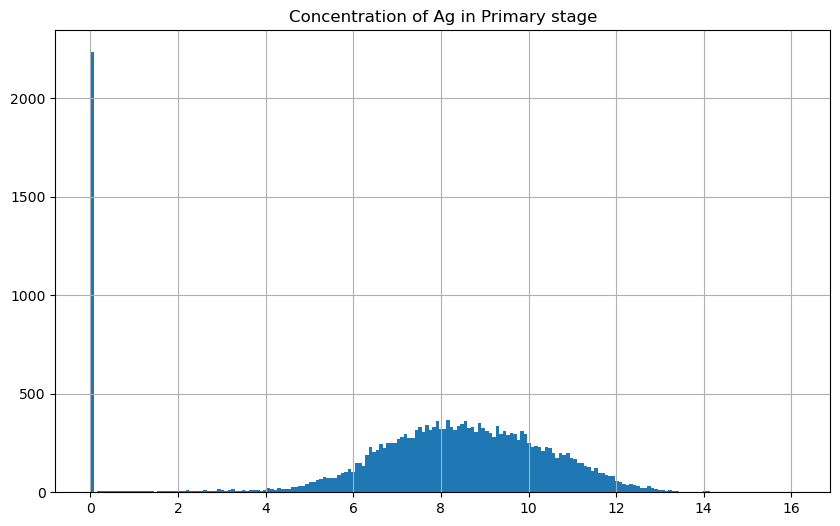

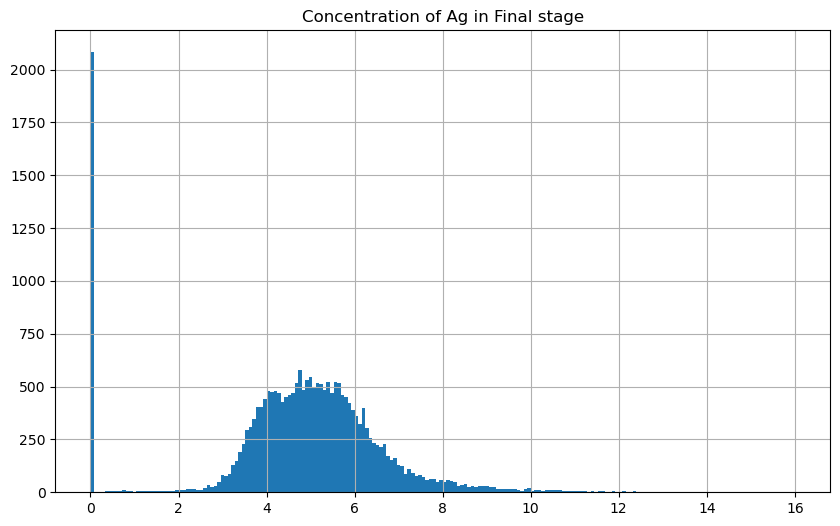

In [15]:
ag_inputs = [('rougher.input.feed_ag', 'Input'), ('rougher.output.concentrate_ag', 'Rougher') \
          ,('primary_cleaner.output.concentrate_ag', 'Primary'), ('final.output.concentrate_ag', 'Final')]
for i in ag_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Concentration of Ag in {} stage'.format(i[1]))
    plt.show()

Na etapa final, as concentrações de prata são mais elevadas, seguidas pela etapa de `flotação`, etapa de purificação primária e etapa de entrada. Mais uma vez, é perceptível a presença de muitos valores zero. Por último, vamos examinar a concentração de chumbo (Pb):

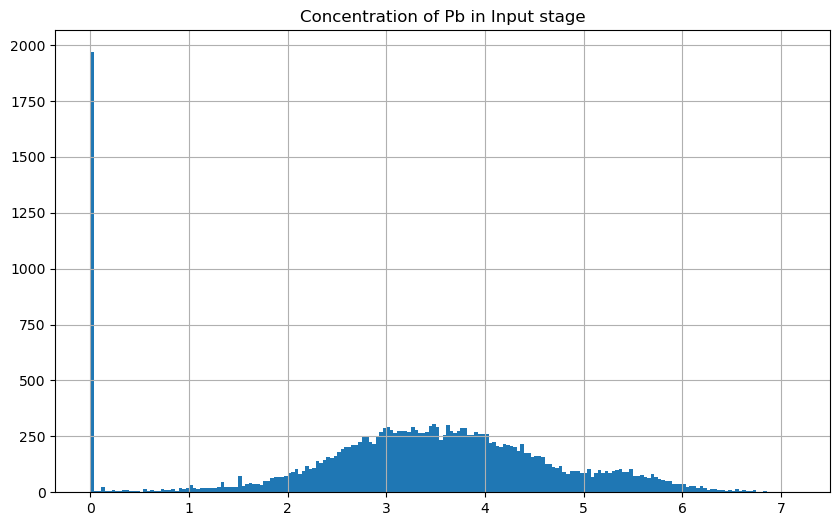

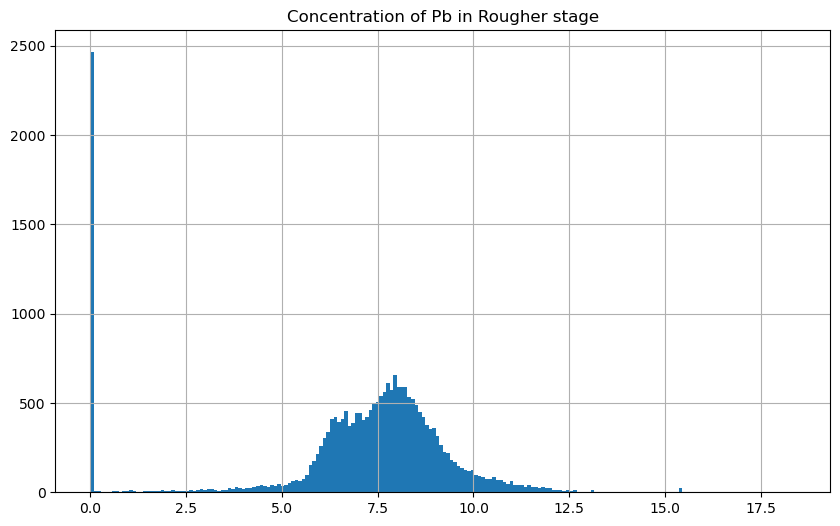

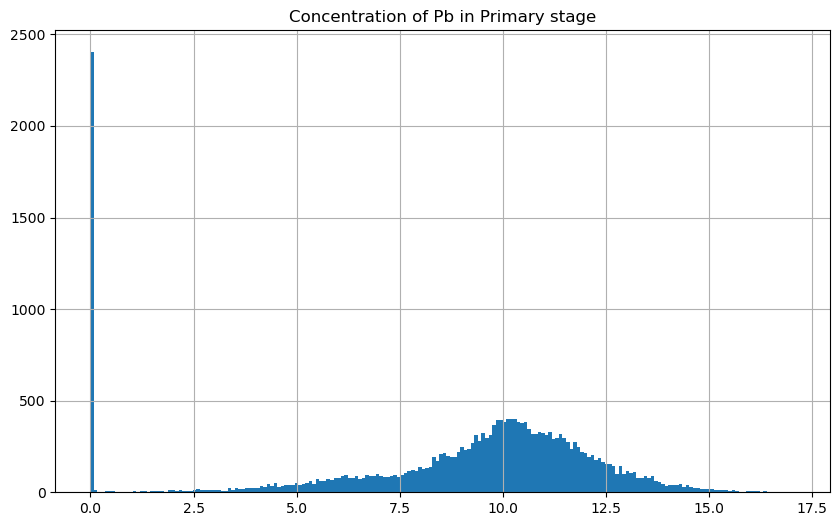

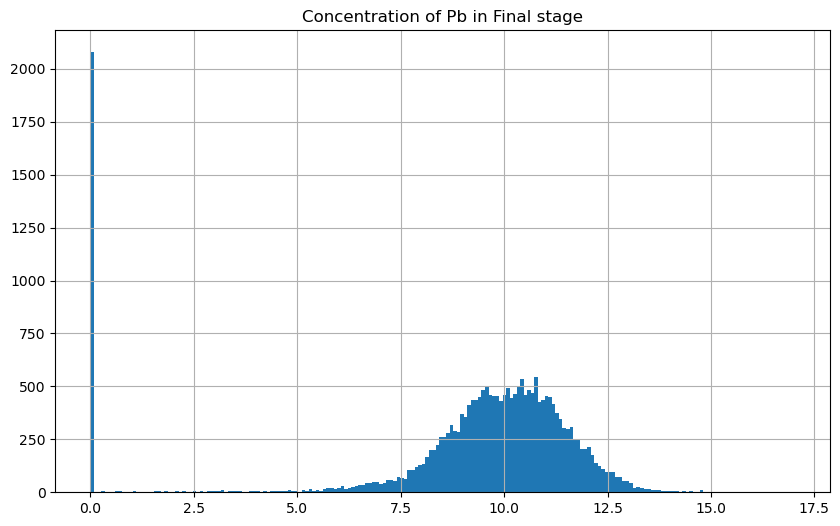

In [16]:
pb_inputs = [('rougher.input.feed_pb', 'Input'), ('rougher.output.concentrate_pb', 'Rougher') \
          ,('primary_cleaner.output.concentrate_pb', 'Primary'), ('final.output.concentrate_pb', 'Final')]
for i in pb_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Concentration of Pb in {} stage'.format(i[1]))
    plt.show()

Na etapa de flotação, as concentrações de chumbo são as mais elevadas, seguidas pela etapa final e em seguida pelas etapas de purificação primária e entrada (Input). Novamente, notamos a presença de muitos valores zero.

### Distribuições de Tamanho de Partículas do Minério Alimentado <a name="dtpma"></a>

Analisaremos e compararemos as distribuições de tamanho das partículas presentes nos conjuntos de treinamento e teste.

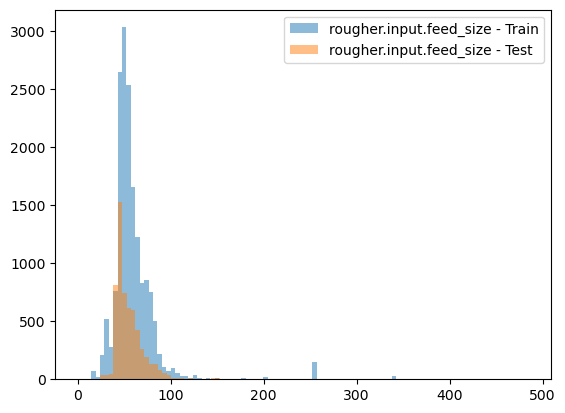

In [17]:
plt.hist(train['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Train')
plt.hist(test['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Test')
plt.legend(loc='upper right')
plt.show()

Com algumas diferenças insignificantes, podemos afirmar que as distribuições são comparáveis, o que é um resultado satisfatório.

### Concentrações Totais de Todos os Metais em Diferentes Estágios <a name="cttmde"></a>

Para cada estágio, obteremos as concentrações de todas as substâncias e agrupá-las.

In [18]:
input_concentrate = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'\
                     , 'rougher.input.feed_sol']

rougher_concentrate = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag'\
                       , 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']

output_concentrate = ['final.output.concentrate_au', 'final.output.concentrate_ag'\
                      , 'final.output.concentrate_pb', 'final.output.concentrate_sol']

input_sum = full[input_concentrate].sum(axis=1).reset_index()
rougher_sum = full[rougher_concentrate].sum(axis=1).reset_index()
output_sum = full[output_concentrate].sum(axis=1).reset_index()

Podemos, então, criar histogramas para visualizar as somas das concentrações. Começaremos pelo estágio de entrada (Input):

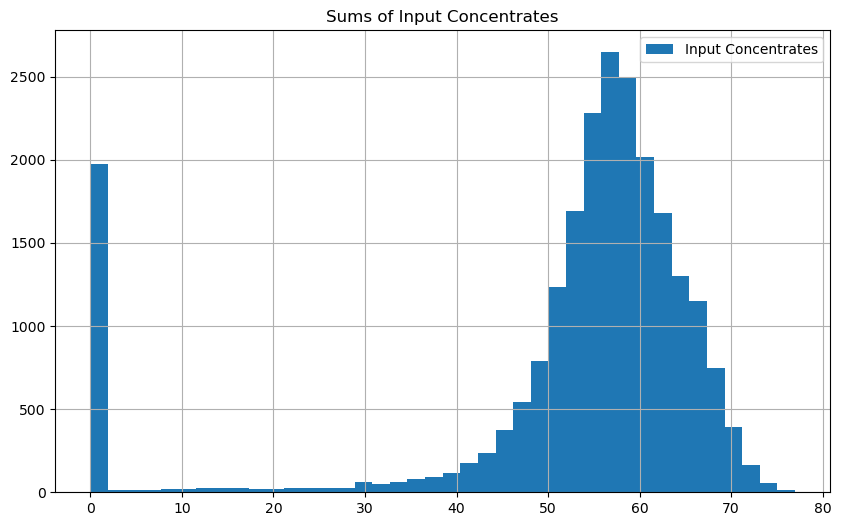

In [19]:
input_sum.hist(bins=40, label='Input Concentrates', figsize=(10, 6))
plt.title('Sums of Input Concentrates')
plt.legend(loc='upper right')
plt.show()

Notamos que as concentrações totais são zero. Isso não é normal, já que o mesmo sugere que nada foi inserido. Agora, analisaremos o estágio de flotação:

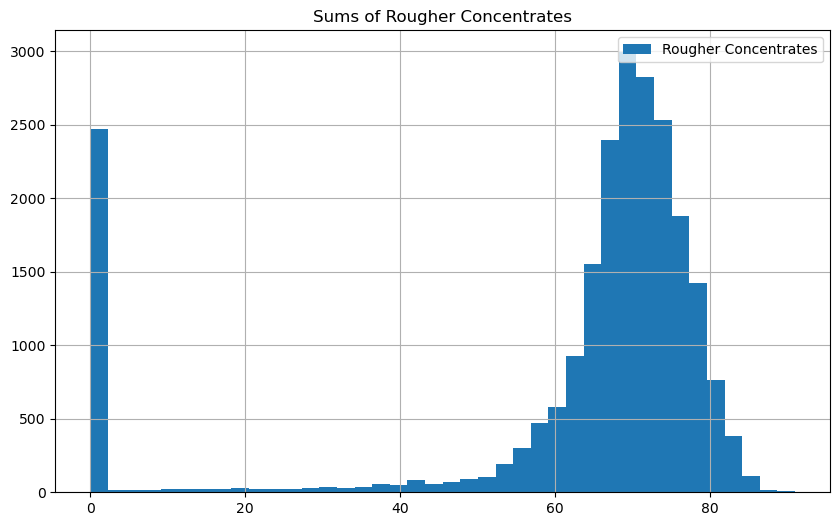

In [20]:
rougher_sum.hist(bins=40, label='Rougher Concentrates', figsize=(10, 6))
plt.title('Sums of Rougher Concentrates')
plt.legend(loc='upper right')
plt.show()

Observamos novamente valores zero nesse caso. Por fim, analisaremos a saída final (Final Output): 

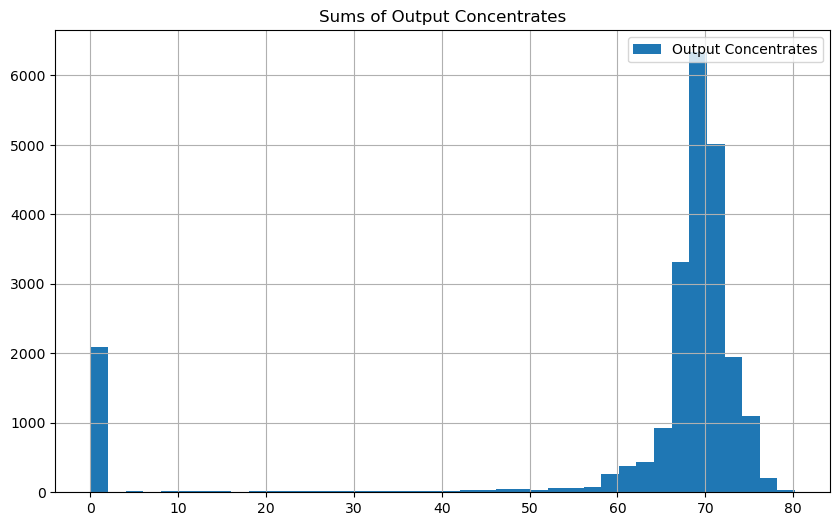

In [21]:
output_sum.hist(bins=40, label='Output Concentrates', figsize=(10, 6))
plt.title('Sums of Output Concentrates')
plt.legend(loc='upper right')
plt.show()

Mais uma vez, encontramos um conjunto de valores zero. As concentrações totais aumentam à medida que avançamos pelos estágios, o que é compreensível. No entanto, é necessário remover os valores zero, pois eles são considerados valores discrepantes (outliers).

In [22]:
train_model = train[train[rougher_concentrate].sum(axis=1)>0]
train_model = train[train[output_concentrate].sum(axis=1)>0]
train_model = train[train[input_concentrate].sum(axis=1)>0]
train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15647 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         15647 non-null  float64
 1   final.output.concentrate_pb                         15647 non-null  float64
 2   final.output.concentrate_sol                        15647 non-null  float64
 3   final.output.concentrate_au                         15647 non-null  float64
 4   final.output.recovery                               15647 non-null  float64
 5   final.output.tail_ag                                15647 non-null  float64
 6   final.output.tail_pb                                15647 non-null  float64
 7   final.output.tail_sol                               15647 non-null  float64
 8   final.output.tail_au                             

Agora identificaremos nossos alvos (targets) no conjunto de treinamento:

In [23]:
train_targets = train_model[['rougher.output.recovery', 'final.output.recovery']]
train_targets.shape

(15647, 2)

Como o conjunto de teste possui menos características(features), faremos com que as colunas do conjunto de treinamento sejam aquelas presentes no conjunto de teste:

In [24]:
train_features = train_model.loc[:, list(test.columns)]
train_features.shape

(15647, 52)

No conjunto de teste, precisamos obter informações sobre as colunas `rougher.output.recovery`, `final.output.recovery`, `rougher.output.concentrate_au`, `rougher.output.concentrate_ag`, `rougher.output.concentrate_pb`, `rougher.output.concentrate_sol`, `final.output.concentrate_au`, `final.output.concentrate_ag`, `final.output.concentrate_pb` e `final.output.concentrate_sol`, que estão ausentes nele. Podemos obter essas informações a partir do conjunto completo de dados. Isso será feito para que posteriormente possamos remover os valores discrepantes (outliers).

In [25]:
subset = ['rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
          'final.output.concentrate_sol']

sub_full = full.loc[:, list(subset)]
sub_full.head()

,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
date,,,,,,,,,,
2016-01-15 00:00:00,87.107763,70.541216,19.793808,11.500771,7.101074,28.029297,42.192020,6.055403,9.889648,5.507324
2016-01-15 01:00:00,86.843261,69.266198,20.050975,11.615865,7.278807,28.067063,42.701629,6.029369,9.968944,5.257781
2016-01-15 02:00:00,86.842308,68.116445,19.737170,11.695753,7.216833,27.454037,42.657501,6.055926,10.213995,5.383759
2016-01-15 03:00:00,87.226430,68.347543,19.320810,11.915047,7.175616,27.341277,42.689819,6.047977,9.977019,4.858634
2016-01-15 04:00:00,86.688794,66.927016,19.216101,12.411054,7.240205,27.041023,42.774141,6.148599,10.142511,4.939416


Agora podemos mesclar as informações com o conjunto de teste fazendo correspondência com base na data.

In [26]:
test_new = test.merge(sub_full, on = 'date')
test_new.shape

(5856, 62)

Removendo os valores discrepantes:

In [27]:
test_model = test_new[test_new[rougher_concentrate].sum(axis=1)>0]
test_model = test_new[test_new[input_concentrate].sum(axis=1)>0]
test_model = test_new[test_new[output_concentrate].sum(axis=1)>0]
test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5505 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5505 non-null   float64
 1   primary_cleaner.input.depressant            5505 non-null   float64
 2   primary_cleaner.input.feed_size             5505 non-null   float64
 3   primary_cleaner.input.xanthate              5505 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5505 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5505 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5505 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5505 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5505 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5505 non-null

Definindo os alvos (targets) no conjunto de teste:

In [28]:
test_targets = test_model[['rougher.output.recovery', 'final.output.recovery']]
test_targets.shape

(5505, 2)

Para as características, selecionaremos apenas as colunas presentes no conjunto de teste original:

In [29]:
test_features = test_model.loc[:, list(test.columns)]
test_features.shape

(5505, 52)

Realizamos uma análise bem sucedida das concentrações de metais ao longo dos estágios, do tamanho das partículas alimentadas, das concentrações totais em diferentes estágios e eliminamos os valores discrepantes (outliers).

## Construindo um Modelo <a name="cm"></a>

Primeiro, criaremos uma função de cálculo do `sMAPE` (Erro Percentual Absoluto Médio Simétrico) com base na fórmula. Em seguida, iremos utilizá-la como métrica para selecionar o melhor modelo. É importante ressaltar que o `sMAPE` é um cálculo de erro percentual, portanto, quanto mais próximo o valor estiver de zero, melhor será o desempenho do modelo.

In [30]:
def finalsMAPE(targ, pred):
    sMAPE_rougher = (np.mean((np.abs(targ.iloc[:, 0] - pred[:, 0]) /\
                              ((np.abs(targ.iloc[:, 0]) + np.abs(pred[:, 0])) / 2))) * 100)

    sMAPE_final = (np.mean((np.abs(targ.iloc[:, 1] - pred[:, 1]) /\
                            ((np.abs(targ.iloc[:, 1]) + np.abs(pred[:, 1])) / 2))) * 100)

    final_sMAPE = sMAPE_rougher * 0.25 + sMAPE_final * 0.75
    return final_sMAPE

sMAPE_score = make_scorer(finalsMAPE, greater_is_better = False)

Agora podemos treinar modelos e verificar as pontuações. Primeiro, utilizaremos a `Regressão Linear`:

In [31]:
lr = LinearRegression()
lr_score = cross_val_score(lr, train_features, train_targets, scoring=sMAPE_score, cv=5)
print(lr_score.mean())

-14.933947375582914


Segundo, utilizaremos a `Árvore de Decisão`. Agora determinaremos qual valor do hiperparâmetro profundidade máxima (max_depth) é o melhor:

In [32]:
for depth in range(1,11):
    dt = DecisionTreeRegressor(max_depth=depth, random_state=state)
    dt_score = cross_val_score(dt, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', dt_score.mean())

Max_Depth= 1 : -13.466059406828458
Max_Depth= 2 : -13.00223250653121
Max_Depth= 3 : -13.00388972313346
Max_Depth= 4 : -13.547953448686593
Max_Depth= 5 : -15.08311372198035
Max_Depth= 6 : -14.306619439989742
Max_Depth= 7 : -15.872243152396091
Max_Depth= 8 : -16.608933696526
Max_Depth= 9 : -16.357322837267617
Max_Depth= 10 : -18.745508172048908


Por último, utilizaremos o `Random Forest`. Em seguida, encontraremos a combinação de `max_depth` e `n_estimators` que oferece o melhor desempenho:

In [33]:
for depth in range(1, 11):
    rf = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state = state)
    rf_score = cross_val_score(rf, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', rf_score.mean())

Max_Depth= 1 : -13.314628035704454
Max_Depth= 2 : -12.517087105677122
Max_Depth= 3 : -12.274325002817985
Max_Depth= 4 : -11.8629850262474
Max_Depth= 5 : -11.978388914029328
Max_Depth= 6 : -12.011322966369145
Max_Depth= 7 : -12.188436983212906
Max_Depth= 8 : -12.553492435253702
Max_Depth= 9 : -12.760935943028333
Max_Depth= 10 : -13.018176563221108


Entre todos esses modelos, o que obteve o melhor desempenho foi o `Random Forest Regressor`, com uma profundidade máxima de `4` e `20` estimadores. Agora, treinaremos o modelo com as características normalizadas e, em seguida, testá-lo no conjunto de teste.

In [34]:
scaler = StandardScaler()
scaler.fit_transform(train_features)
scaler.transform(test_features)

array([[ 1.80026927,  1.71899855,  1.2696192 , ..., -0.18403615,
         1.24045636,  0.21281566],
       [ 1.9012442 ,  1.71748443,  1.2696192 , ..., -0.1862399 ,
         0.96491853,  0.21070278],
       [ 1.89833015,  1.15367308,  0.79039697, ..., -0.18035093,
         0.96081996,  0.19527974],
       ...,
       [ 0.92797262,  1.98730408,  1.2532817 , ..., -0.18408925,
        -1.65618602,  0.2496781 ],
       [ 1.11625144,  1.83855966,  1.2532817 , ..., -0.18228047,
        -1.65118146,  0.20427243],
       [ 1.15714897,  1.71973116,  1.2532817 , ..., -0.18933044,
        -1.65510837,  0.19254553]])

Teste final:

In [35]:
model = RandomForestRegressor(n_estimators=20, max_depth=4, random_state = state)
model.fit(train_features, train_targets)
predictions = model.predict(test_features)
print(finalsMAPE(test_targets, predictions))

9.038612693424398


## Conclusão <a name="con"></a>
Realizamos uma série de análises e etapas no projeto:

Começamos analisando as concentrações de metais ao longo das diferentes etapas de purificação. Observamos que as concentrações de chumbo são mais altas no estágio de flotação, seguidas pelo estágio final, e depois pelos estágios de purificação primária e input. Por outro lado, as concentrações de prata são mais altas no estágio final, seguidas pelo estágio de flotação, o estágio de purificação primária e o estágio de input. Enquanto isso, as concentrações de ouro apresentaram um aumento constante à medida que avançamos para os estágios subsequentes. Também notamos um aumento geral nas concentrações totais ao longo das etapas de purificação.

Em seguida, examinamos as distribuições de tamanho das partículas alimentadas nos conjuntos de treinamento e teste e constatamos que são semelhantes, o que indica consistência entre os dados.

Depois, procedemos com o treinamento de vários modelos para selecionar o mais adequado. Utilizamos a Regressão Linear, Árvore de Decisão e a Regressão de Floresta Aleatória. Com base nas pontuações obtidas, o Random Forest Regressor se destacou como o melhor modelo, com uma profundidade máxima de 4 e 20 estimadores. Essa escolha foi validada por meio da métrica sMAPE (Erro Percentual Absoluto Médio Simétrico), que indica o desempenho do modelo na previsão das concentrações. A Regressão de Floresta Aleatória obteve um valor de sMAPE de 9,04%, o que indica uma boa precisão e uma boa correspondência entre as previsões e os valores reais.

Por fim, aplicamos o modelo treinado com as características escaladas no conjunto de teste para fazer previsões e avaliar seu desempenho em dados não vistos anteriormente.